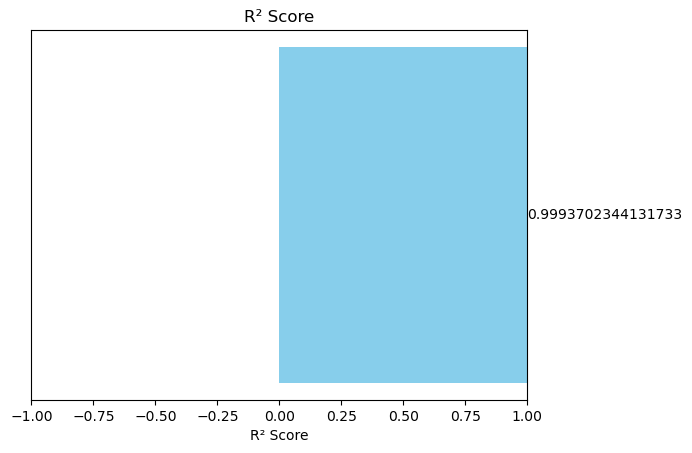

In [32]:
import matplotlib.pyplot as plt

# Plotting the R² score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R² Score')
ax.set_title('R² Score')

# Adding the R² score value on the bar
ax.text(r2, 0, f'{r2}', va='center', color='black')
plt.show()



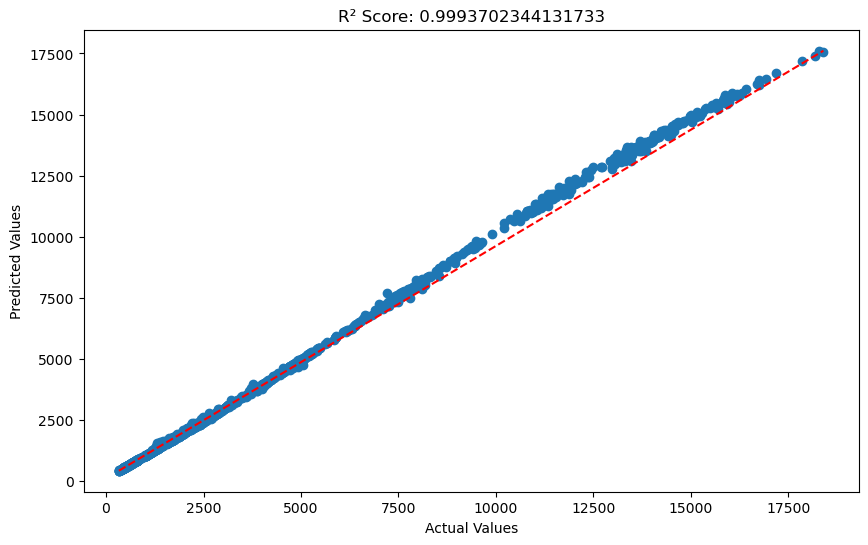

In [34]:
# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(Y_actual, Y_pred)
plt.plot([min(Y_actual), max(Y_actual)], [min(Y_pred), max(Y_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R² Score: {r2}')
plt.show()

# This scatter plot visualizes the relationship between actual and predicted values.The red dashed line represents the ideal scenario where predicted values perfectly match actual values.


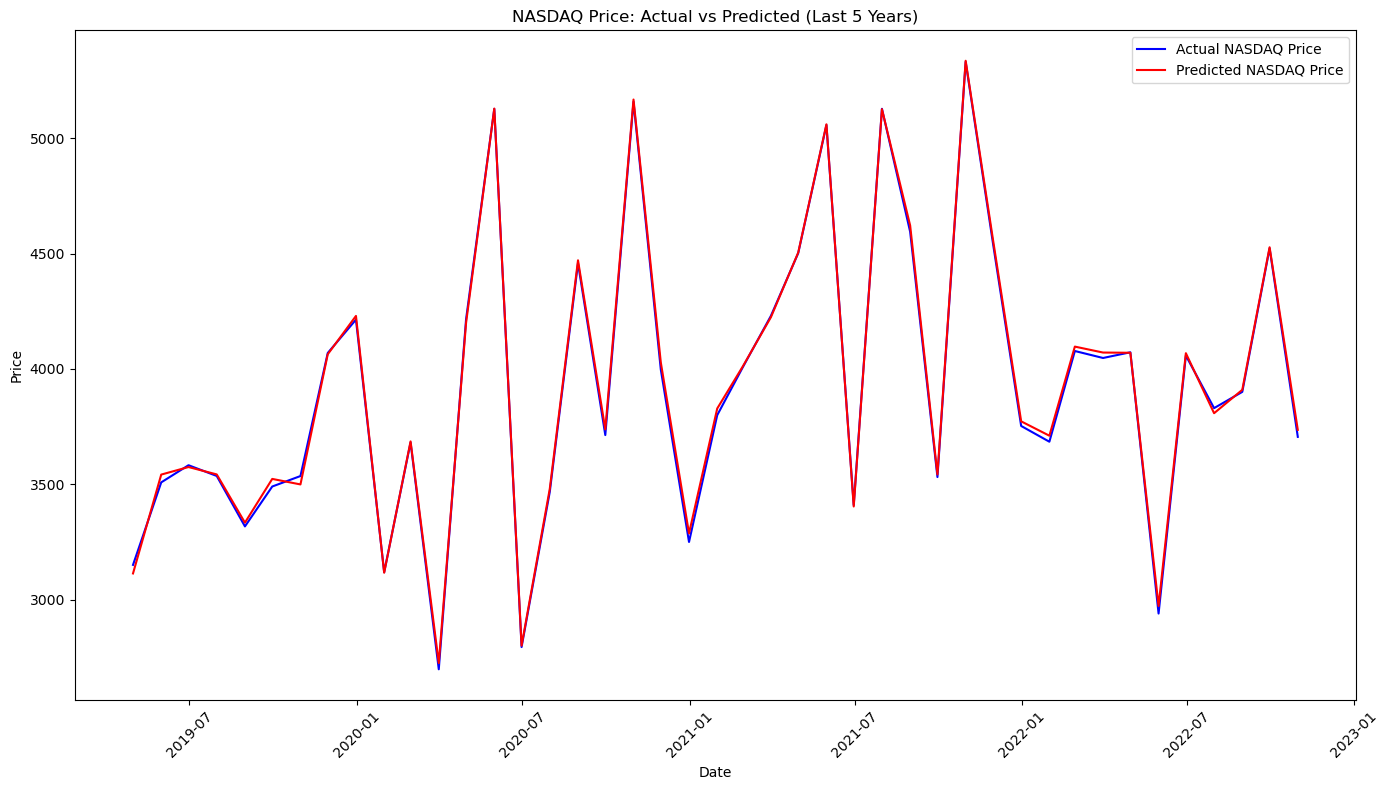

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Inverse transform the predictions and actual values
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)
Y_actual = scaler_Y.inverse_transform(Y_test)

# Select the recent data for the last 5 years
recent_period = 5 * 252  
recent_dates = full_dates[-recent_period:]
recent_Y_test_actual = Y_actual[-recent_period:]
recent_test_predict = Y_pred[-recent_period:]

# Create a DataFrame with the recent data
recent_data = pd.DataFrame({
    'Date': recent_dates,
    'Actual': recent_Y_test_actual.flatten(),
    'Predicted': recent_test_predict.flatten()
})

# Set the 'Date' column as the index
recent_data.set_index('Date', inplace=True)

# Downsample the data to monthly frequency to make it more readable
recent_data_monthly = recent_data.resample('M').mean()

# Plot the monthly aggregated data
plt.figure(figsize=(14, 8))
plt.plot(recent_data_monthly.index, recent_data_monthly['Actual'], color='blue', label='Actual NASDAQ Price')
plt.plot(recent_data_monthly.index, recent_data_monthly['Predicted'], color='red', label='Predicted NASDAQ Price')
plt.title('NASDAQ Price: Actual vs Predicted (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
